# Práctica - ggplot Series

Generar 3 dataframes en R, cada uno de ellos con los datos de al menos una año del tráfico de mercancías, pasajeros y vehículos.

Mostrar la evolución temporal del tránsito en la provincia de Santa Cruz de Tenerife.

[Dataset](http://risp.puertosdetenerife.org/dataset/trafico-de-mercancias)

In [199]:
# Importamos las librerías necesarias
library(ggplot2)
library(readxl)
library(rvest)
library(dplyr)
library(readr)

## Web scrapping
Web scraping o raspado web, es una técnica utilizada mediante programas de software para extraer información de sitios web.​ Usualmente, estos programas simulan la navegación de un humano en la World Wide Web ya sea utilizando el protocolo HTTP manualmente, o incrustando un navegador en una aplicación.

In [200]:
# Definimos la función para realizar web scrapping
webscrap<-function(type, year){
  trafico<-""

  # Definimos lo que deseamos encontrar
  xpath <- '//*[@class="heading" and contains(text(), "'
  xpath <- paste(xpath, year, sep="")
  xpath <- paste(xpath, '")]', sep="")

  html.puertostfe <- read_html(paste("http://risp.puertosdetenerife.org/dataset/", type,sep=""))
  rutas<-html.puertostfe %>% html_nodes(xpath=xpath)%>%html_attr("href")

  # Le damos la vuelta al vector para tener los meses ordenados
  rutas <- rev(rutas)
  rutas

  for (i in 1:length(rutas)){
    url<-"http://risp.puertosdetenerife.org"
    url<-paste(url, paste(rutas[i], "/download/", sep=""), sep="")
    url<-paste(url, year, sep="")

    #print(url)

    if(i<10){
      url_mes <- paste("0", as.character(i),sep="")
    }
    else{
      url_mes <- as.character(i)
    }

    file <- gsub("-", "", type)
    file <- paste(file, ".xlsx", sep="")

    url<-paste(url, paste(url_mes, file, sep=""), sep="")
    #print(url)

    destino<-paste("traficoAux", paste(url_mes,".xlsx", sep=""), sep="")
    print(url)
    print(destino)

    download.file(url, destino)

    trafico<-rbind(trafico, read_xls(destino))
    str(trafico)
  }

  return (trafico)
}

## Tráfico de mercancías

In [201]:
tmercancias <- webscrap("trafico-de-mercancias", 2020)

[1] "http://risp.puertosdetenerife.org/dataset/trafico-de-mercancias/resource/57206c78-4e88-443a-bfa6-82254b6ad8f2/download/202001traficodemercancias.xlsx"
[1] "traficoAux01.xlsx"
tibble [7,094 × 15] (S3: tbl_df/tbl/data.frame)
 $ Año                                  : chr [1:7094] "" "2020" "2020" "2020" ...
 $ Mes                                  : chr [1:7094] "" "ene" "ene" "ene" ...
 $ Puerto                               : chr [1:7094] "" "LA ESTACA (EL HIERRO)" "LA ESTACA (EL HIERRO)" "LA ESTACA (EL HIERRO)" ...
 $ Subgrupo                             : chr [1:7094] "" "Automóviles y sus piezas" "Automóviles y sus piezas" "Automóviles y sus piezas" ...
 $ Cód Arancelario Mercancía            : chr [1:7094] "" "8703E" "8703E" "8703I" ...
 $ Descripción Cód Arancelario Mercancía: chr [1:7094] "" "Turismos, No Eléctr. o Híbr. hasta 2,5 Ton, nuevos" "Turismos, No Eléctr. o Híbr. hasta 2,5 Ton, nuevos" "Turismos, No Eléctr. o Híbr. > 2,5 Ton, nuevos" ...
 $ Operación                 

In [202]:
head(tmercancias)

Año,Mes,Puerto,Subgrupo,Cód Arancelario Mercancía,Descripción Cód Arancelario Mercancía,Operación,País Origen,Puerto Origen,Pais Destino,Puerto Destino,Forma Presentación,Tipo de Navegación,Tipo de Territorio,Toneladas
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
,,,,,,,,,,,,,,
2020,ene,LA ESTACA (EL HIERRO),Automóviles y sus piezas,8703E,"Turismos, No Eléctr. o Híbr. hasta 2,5 Ton, nuevos",Cargadas,ESPAÑA,La Estaca (El Hierro),ESPAÑA,Los Cristianos,Mercancía General,Cabotaje Tenerife,Canarias,39.94
2020,ene,LA ESTACA (EL HIERRO),Automóviles y sus piezas,8703E,"Turismos, No Eléctr. o Híbr. hasta 2,5 Ton, nuevos",Descargadas,ESPAÑA,Los Cristianos,ESPAÑA,La Estaca (El Hierro),Mercancía General,Cabotaje Tenerife,Canarias,44.8
2020,ene,LA ESTACA (EL HIERRO),Automóviles y sus piezas,8703I,"Turismos, No Eléctr. o Híbr. > 2,5 Ton, nuevos",Cargadas,ESPAÑA,La Estaca (El Hierro),ESPAÑA,Los Cristianos,Mercancía General,Cabotaje Tenerife,Canarias,13.38
2020,ene,LA ESTACA (EL HIERRO),Automóviles y sus piezas,8703I,"Turismos, No Eléctr. o Híbr. > 2,5 Ton, nuevos",Descargadas,ESPAÑA,Los Cristianos,ESPAÑA,La Estaca (El Hierro),Mercancía General,Cabotaje Tenerife,Canarias,1.5
2020,ene,LA ESTACA (EL HIERRO),Automóviles y sus piezas,8711,MOTOCICLETAS (INCLUSO CON PEDA,Cargadas,ESPAÑA,La Estaca (El Hierro),ESPAÑA,Los Cristianos,Mercancía General,Cabotaje Tenerife,Canarias,0.22


In [203]:
# Añadimos la columna fecha
tmercancias$Fecha <- parse_date(with(tmercancias, paste(Mes, Año,sep="./")),"%b/%Y",locale=locale("es"))
head(tmercancias)

Warning message:
“7156 parsing failures.
  row col        expected    actual
    1  -- date like %b/%Y ./       
55645  -- date like %b/%Y sep./2020
55646  -- date like %b/%Y sep./2020
55647  -- date like %b/%Y sep./2020
55648  -- date like %b/%Y sep./2020
..... ... ............... .........
See problems(...) for more details.
”


Año,Mes,Puerto,Subgrupo,Cód Arancelario Mercancía,Descripción Cód Arancelario Mercancía,Operación,País Origen,Puerto Origen,Pais Destino,Puerto Destino,Forma Presentación,Tipo de Navegación,Tipo de Territorio,Toneladas,Fecha
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>
,,,,,,,,,,,,,,,NA
2020,ene,LA ESTACA (EL HIERRO),Automóviles y sus piezas,8703E,"Turismos, No Eléctr. o Híbr. hasta 2,5 Ton, nuevos",Cargadas,ESPAÑA,La Estaca (El Hierro),ESPAÑA,Los Cristianos,Mercancía General,Cabotaje Tenerife,Canarias,39.94,2020-01-01
2020,ene,LA ESTACA (EL HIERRO),Automóviles y sus piezas,8703E,"Turismos, No Eléctr. o Híbr. hasta 2,5 Ton, nuevos",Descargadas,ESPAÑA,Los Cristianos,ESPAÑA,La Estaca (El Hierro),Mercancía General,Cabotaje Tenerife,Canarias,44.8,2020-01-01
2020,ene,LA ESTACA (EL HIERRO),Automóviles y sus piezas,8703I,"Turismos, No Eléctr. o Híbr. > 2,5 Ton, nuevos",Cargadas,ESPAÑA,La Estaca (El Hierro),ESPAÑA,Los Cristianos,Mercancía General,Cabotaje Tenerife,Canarias,13.38,2020-01-01
2020,ene,LA ESTACA (EL HIERRO),Automóviles y sus piezas,8703I,"Turismos, No Eléctr. o Híbr. > 2,5 Ton, nuevos",Descargadas,ESPAÑA,Los Cristianos,ESPAÑA,La Estaca (El Hierro),Mercancía General,Cabotaje Tenerife,Canarias,1.5,2020-01-01
2020,ene,LA ESTACA (EL HIERRO),Automóviles y sus piezas,8711,MOTOCICLETAS (INCLUSO CON PEDA,Cargadas,ESPAÑA,La Estaca (El Hierro),ESPAÑA,Los Cristianos,Mercancía General,Cabotaje Tenerife,Canarias,0.22,2020-01-01


Warning message:
“Removed 7156 rows containing non-finite values (stat_density).”


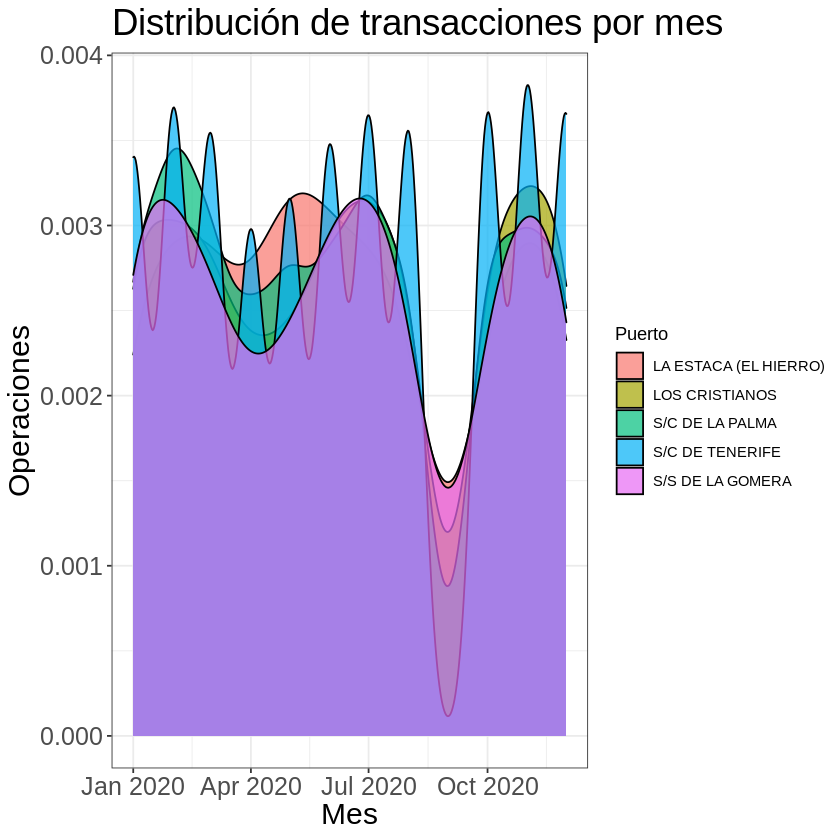

In [208]:
# Mostramos la distribuvión de transito a lo largo del tiempo
ggplot(tmercancias, aes(x=Fecha))+
  geom_density(aes(fill=Puerto),alpha=0.7)+
labs(x="Mes",
         y="Operaciones", 
       title="Distribución de transacciones por mes")+  
theme_bw()+
theme(plot.title = element_text(size=22)
      ,axis.text.x= element_text(size=15),
       axis.text.y= element_text(size=15),
        axis.title=element_text(size=18))

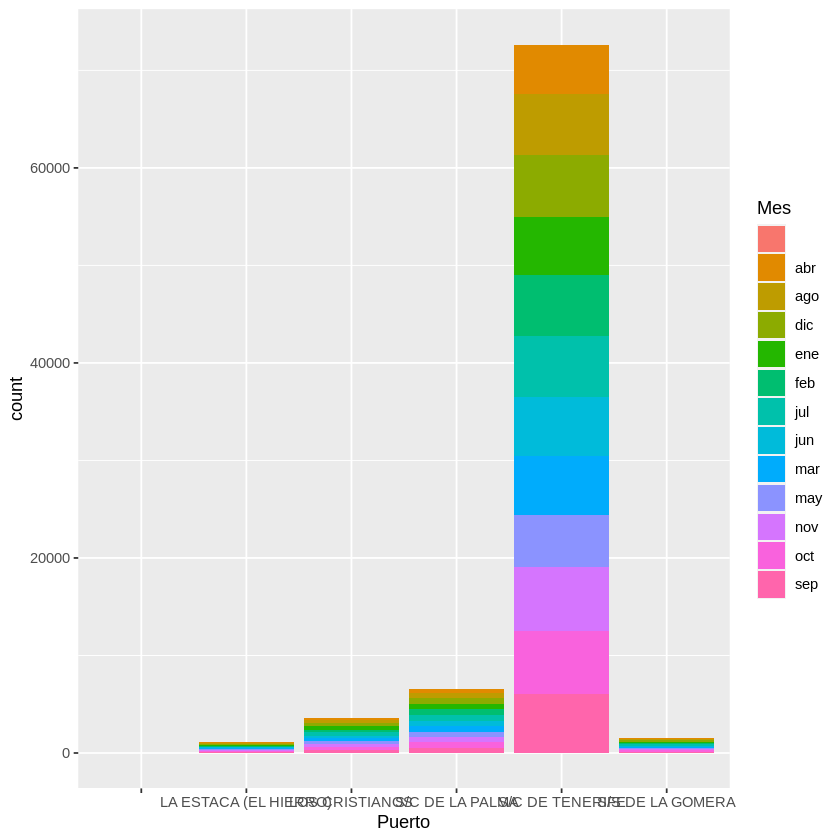

In [209]:
# Mostramos el total de mercancia que llega a cada puerto durante los meses
ggplot(data = tmercancias) + geom_bar(mapping = aes(x = Puerto, fill = Mes))

## Tráfico de pasajeros

In [226]:
tpasajeros <- webscrap("trafico-de-pasajeros", 2020)

[1] "http://risp.puertosdetenerife.org/dataset/trafico-de-pasajeros/resource/c52373a6-3f65-4a8a-b921-0fc7cbcfe6b5/download/202001traficodepasajeros.xlsx"
[1] "traficoAux01.xlsx"
tibble [142 × 11] (S3: tbl_df/tbl/data.frame)
 $ Año                        : chr [1:142] "" "2020" "2020" "2020" ...
 $ Mes                        : chr [1:142] "" "ene" "ene" "ene" ...
 $ Puerto                     : chr [1:142] "" "LA ESTACA (EL HIERRO)" "LA ESTACA (EL HIERRO)" "LA ESTACA (EL HIERRO)" ...
 $ Cód Arancelario            : chr [1:142] "" "0001C" "0001D" "0001D" ...
 $ Descripción Cód Arancelario: chr [1:142] "" "Cruceristas en Transito" "Conductores de camión" "Conductores de camión" ...
 $ Operación                  : chr [1:142] "" "Tránsito" "Cargadas" "Descargadas" ...
 $ País Origen                : chr [1:142] "" "ESPAÑA" "ESPAÑA" "ESPAÑA" ...
 $ Puerto Origen              : chr [1:142] "" "Santa Cruz de Tenerife" "La Estaca (El Hierro)" "Los Cristianos" ...
 $ País Destino               

In [227]:
head(tpasajeros)

Año,Mes,Puerto,Cód Arancelario,Descripción Cód Arancelario,Operación,País Origen,Puerto Origen,País Destino,Puerto Destino,Unidades
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
,,,,,,,,,,
2020,ene,LA ESTACA (EL HIERRO),0001C,Cruceristas en Transito,Tránsito,ESPAÑA,Santa Cruz de Tenerife,ESPAÑA,Santa Cruz de la Palma,1578
2020,ene,LA ESTACA (EL HIERRO),0001D,Conductores de camión,Cargadas,ESPAÑA,La Estaca (El Hierro),ESPAÑA,Los Cristianos,82
2020,ene,LA ESTACA (EL HIERRO),0001D,Conductores de camión,Descargadas,ESPAÑA,Los Cristianos,ESPAÑA,La Estaca (El Hierro),101
2020,ene,LA ESTACA (EL HIERRO),1,Pasajeros en régimen de transporte,Cargadas,ESPAÑA,La Estaca (El Hierro),ESPAÑA,Los Cristianos,5555
2020,ene,LA ESTACA (EL HIERRO),1,Pasajeros en régimen de transporte,Descargadas,ESPAÑA,Los Cristianos,ESPAÑA,La Estaca (El Hierro),5896


In [228]:
# Añadimos la columna fecha
tpasajeros$Fecha <- parse_date(with(tpasajeros, paste(Mes, Año,sep="./")),"%b/%Y",locale=locale("es"))
head(tpasajeros)

Warning message:
“71 parsing failures.
row col        expected    actual
  1  -- date like %b/%Y ./       
763  -- date like %b/%Y sep./2020
764  -- date like %b/%Y sep./2020
765  -- date like %b/%Y sep./2020
766  -- date like %b/%Y sep./2020
... ... ............... .........
See problems(...) for more details.
”


Año,Mes,Puerto,Cód Arancelario,Descripción Cód Arancelario,Operación,País Origen,Puerto Origen,País Destino,Puerto Destino,Unidades,Fecha
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>
,,,,,,,,,,,NA
2020,ene,LA ESTACA (EL HIERRO),0001C,Cruceristas en Transito,Tránsito,ESPAÑA,Santa Cruz de Tenerife,ESPAÑA,Santa Cruz de la Palma,1578,2020-01-01
2020,ene,LA ESTACA (EL HIERRO),0001D,Conductores de camión,Cargadas,ESPAÑA,La Estaca (El Hierro),ESPAÑA,Los Cristianos,82,2020-01-01
2020,ene,LA ESTACA (EL HIERRO),0001D,Conductores de camión,Descargadas,ESPAÑA,Los Cristianos,ESPAÑA,La Estaca (El Hierro),101,2020-01-01
2020,ene,LA ESTACA (EL HIERRO),1,Pasajeros en régimen de transporte,Cargadas,ESPAÑA,La Estaca (El Hierro),ESPAÑA,Los Cristianos,5555,2020-01-01
2020,ene,LA ESTACA (EL HIERRO),1,Pasajeros en régimen de transporte,Descargadas,ESPAÑA,Los Cristianos,ESPAÑA,La Estaca (El Hierro),5896,2020-01-01


Warning message:
“Removed 71 rows containing non-finite values (stat_density).”


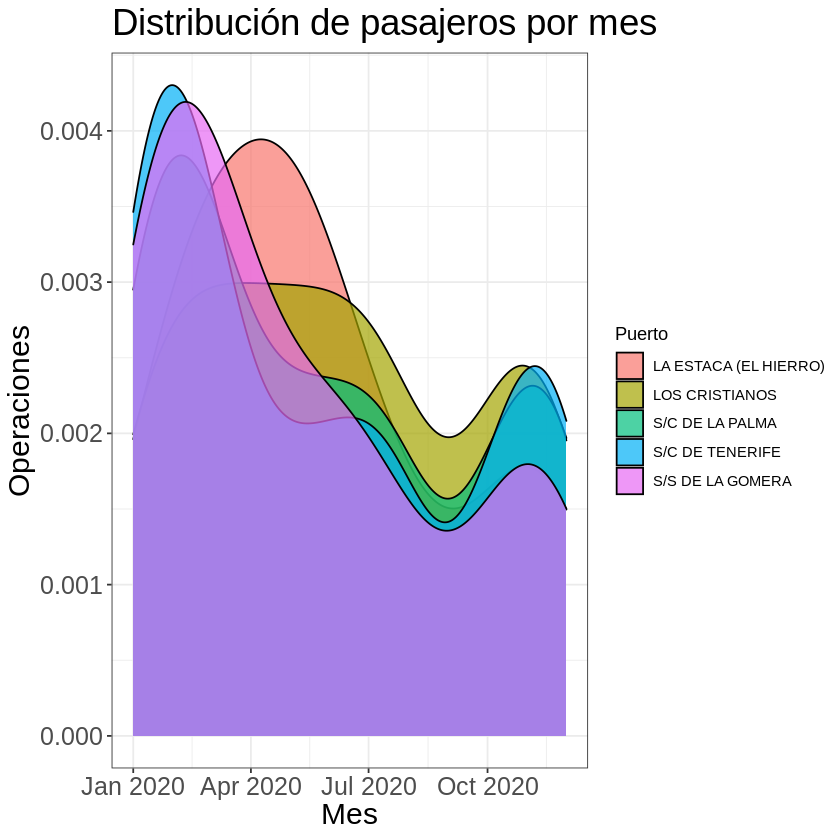

In [230]:
# Mostramos la distribuvión de pasajeros a lo largo del tiempo
ggplot(tpasajeros, aes(x=Fecha))+
  geom_density(aes(fill=Puerto),alpha=0.7)+
labs(x="Mes",
         y="Operaciones", 
       title="Distribución de pasajeros por mes")+  
theme_bw()+
theme(plot.title = element_text(size=22)
      ,axis.text.x= element_text(size=15),
       axis.text.y= element_text(size=15),
        axis.title=element_text(size=18))

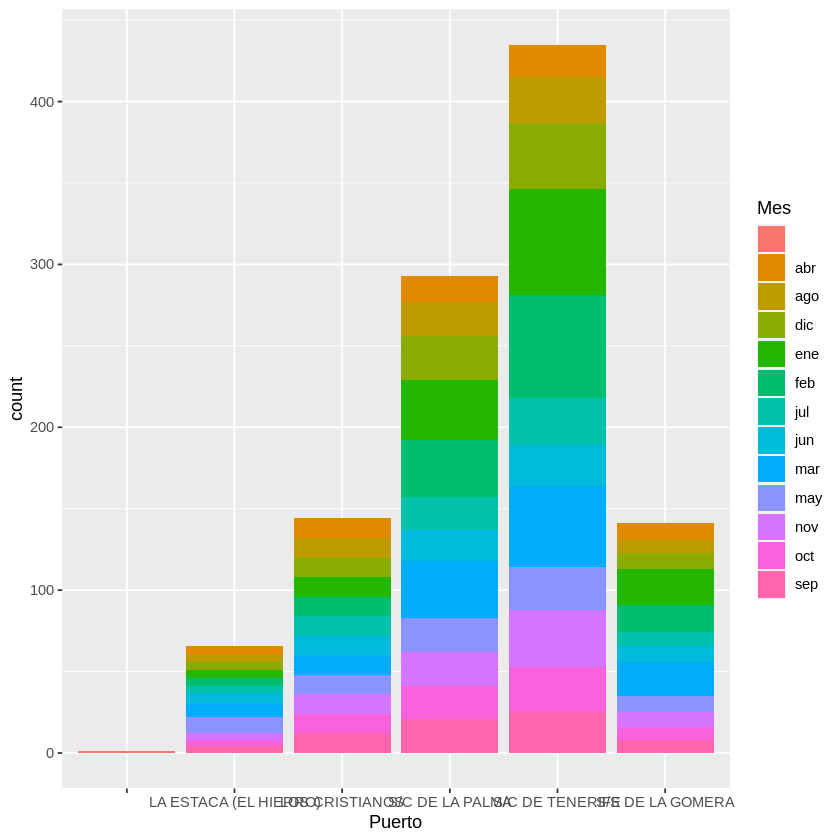

In [231]:
# Mostramos el total de mercancia que llega a cada puerto durante los meses
ggplot(data = tpasajeros) + geom_bar(mapping = aes(x = Puerto, fill = Mes))

## Tráfico de vehiculos

In [235]:
tvehiculos <- webscrap("vehiculos-en-regimen-de-pasaje", 2020)

[1] "http://risp.puertosdetenerife.org/dataset/vehiculos-en-regimen-de-pasaje/resource/8babeb8b-0703-4ee5-b44d-774351a838b4/download/202001vehiculosenregimendepasaje.xlsx"
[1] "traficoAux01.xlsx"
tibble [101 × 11] (S3: tbl_df/tbl/data.frame)
 $ Año                        : chr [1:101] "" "2020" "2020" "2020" ...
 $ Mes                        : chr [1:101] "" "ene" "ene" "ene" ...
 $ Puerto                     : chr [1:101] "" "LA ESTACA (EL HIERRO)" "LA ESTACA (EL HIERRO)" "LA ESTACA (EL HIERRO)" ...
 $ Cód Arancelario            : chr [1:101] "" "4" "4" "5" ...
 $ Descripción Cód Arancelario: chr [1:101] "" "Motocicletas" "Motocicletas" "Turismos hasta 5 metros" ...
 $ Operación                  : chr [1:101] "" "Cargadas" "Descargadas" "Cargadas" ...
 $ País Origen                : chr [1:101] "" "ESPAÑA" "ESPAÑA" "ESPAÑA" ...
 $ Puerto Origen              : chr [1:101] "" "La Estaca (El Hierro)" "Los Cristianos" "La Estaca (El Hierro)" ...
 $ País Destino               : chr [1:101]

In [236]:
head(tvehiculos)

Año,Mes,Puerto,Cód Arancelario,Descripción Cód Arancelario,Operación,País Origen,Puerto Origen,País Destino,Puerto Destino,Unidades
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
,,,,,,,,,,
2020,ene,LA ESTACA (EL HIERRO),4,Motocicletas,Cargadas,ESPAÑA,La Estaca (El Hierro),ESPAÑA,Los Cristianos,23
2020,ene,LA ESTACA (EL HIERRO),4,Motocicletas,Descargadas,ESPAÑA,Los Cristianos,ESPAÑA,La Estaca (El Hierro),30
2020,ene,LA ESTACA (EL HIERRO),5,Turismos hasta 5 metros,Cargadas,ESPAÑA,La Estaca (El Hierro),ESPAÑA,Los Cristianos,2191
2020,ene,LA ESTACA (EL HIERRO),5,Turismos hasta 5 metros,Descargadas,ESPAÑA,Los Cristianos,ESPAÑA,La Estaca (El Hierro),2352
2020,ene,LOS CRISTIANOS,4,Motocicletas,Cargadas,ESPAÑA,Los Cristianos,ESPAÑA,La Estaca (El Hierro),30


In [237]:
# Añadimos la columna fecha
tvehiculos$Fecha <- parse_date(with(tvehiculos, paste(Mes, Año,sep="./")),"%b/%Y",locale=locale("es"))
head(tvehiculos)

Warning message:
“98 parsing failures.
row col        expected    actual
  1  -- date like %b/%Y ./       
757  -- date like %b/%Y sep./2020
758  -- date like %b/%Y sep./2020
759  -- date like %b/%Y sep./2020
760  -- date like %b/%Y sep./2020
... ... ............... .........
See problems(...) for more details.
”


Año,Mes,Puerto,Cód Arancelario,Descripción Cód Arancelario,Operación,País Origen,Puerto Origen,País Destino,Puerto Destino,Unidades,Fecha
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>
,,,,,,,,,,,NA
2020,ene,LA ESTACA (EL HIERRO),4,Motocicletas,Cargadas,ESPAÑA,La Estaca (El Hierro),ESPAÑA,Los Cristianos,23,2020-01-01
2020,ene,LA ESTACA (EL HIERRO),4,Motocicletas,Descargadas,ESPAÑA,Los Cristianos,ESPAÑA,La Estaca (El Hierro),30,2020-01-01
2020,ene,LA ESTACA (EL HIERRO),5,Turismos hasta 5 metros,Cargadas,ESPAÑA,La Estaca (El Hierro),ESPAÑA,Los Cristianos,2191,2020-01-01
2020,ene,LA ESTACA (EL HIERRO),5,Turismos hasta 5 metros,Descargadas,ESPAÑA,Los Cristianos,ESPAÑA,La Estaca (El Hierro),2352,2020-01-01
2020,ene,LOS CRISTIANOS,4,Motocicletas,Cargadas,ESPAÑA,Los Cristianos,ESPAÑA,La Estaca (El Hierro),30,2020-01-01


Warning message:
“Removed 98 rows containing non-finite values (stat_density).”


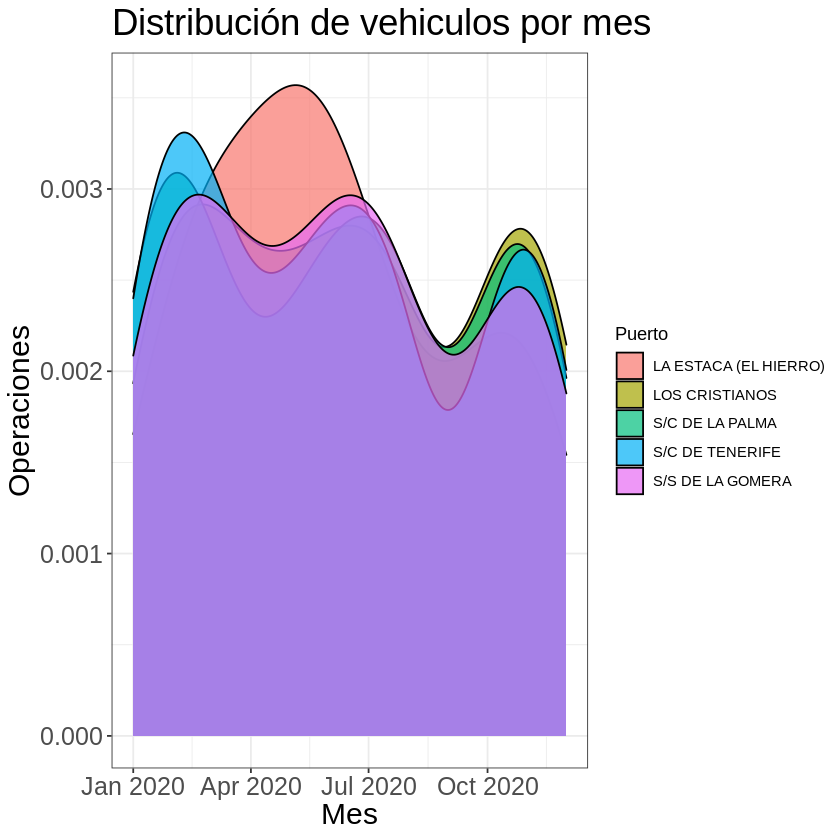

In [240]:
# Mostramos la distribuvión de vehiculos a lo largo del tiempo
ggplot(tvehiculos, aes(x=Fecha))+
  geom_density(aes(fill=Puerto),alpha=0.7)+
labs(x="Mes",
         y="Operaciones", 
       title="Distribución de vehiculos por mes")+  
theme_bw()+
theme(plot.title = element_text(size=22)
      ,axis.text.x= element_text(size=15),
       axis.text.y= element_text(size=15),
        axis.title=element_text(size=18))

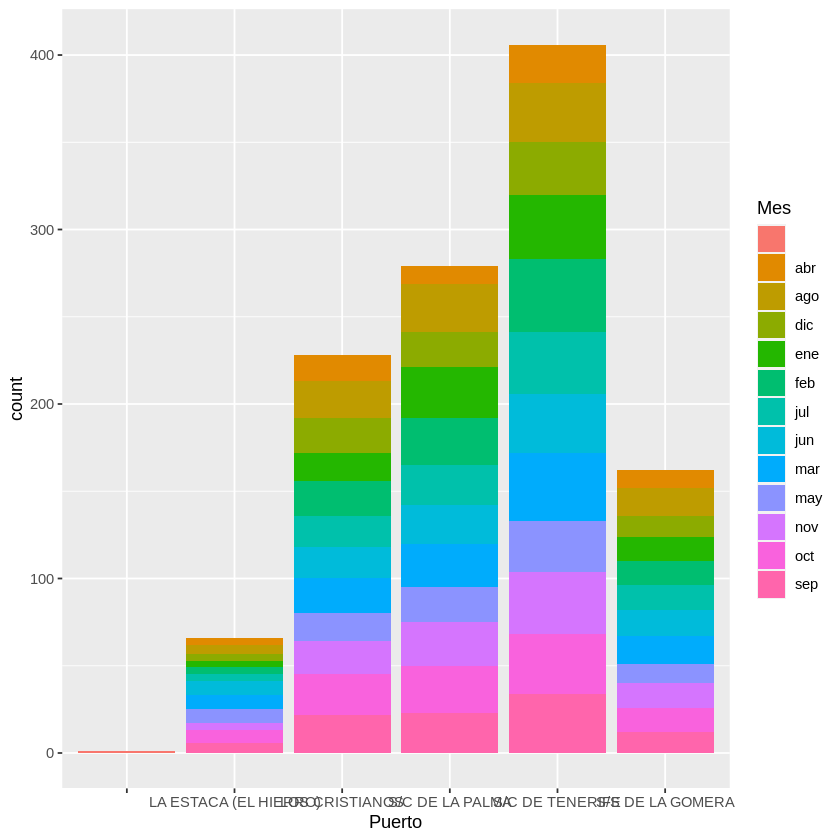

In [239]:
# Mostramos el total de mercancia que llega a cada puerto durante los meses
ggplot(data = tvehiculos) + geom_bar(mapping = aes(x = Puerto, fill = Mes))